In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1e26d5c5050>,
 [Text(1.058871228953308, 0.29797939609125923, 'Data Science'),
  Text(0.7841417468169058, 0.7714413269322118, 'HR'),
  Text(0.4134731563409379, 1.0193330903024107, 'Advocate'),
  Text(0.053862331076050214, 1.098680503736666, 'Arts'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'Mechanical Engineer'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Sales'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Health and fitness'),
  Text(-1.0745482070561094, 0.23525762625789806, 'Civil Engineer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Java Developer'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Business Analyst'),
  Text(-0.9271404102234844, -0.5919549473825093, 'SAP Developer'),
  Text(-0.7427813690411197, -0.811341998053472, 'Automation Testing'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Electrical Engineering'),
  Text(-0.291057286964679, -1.

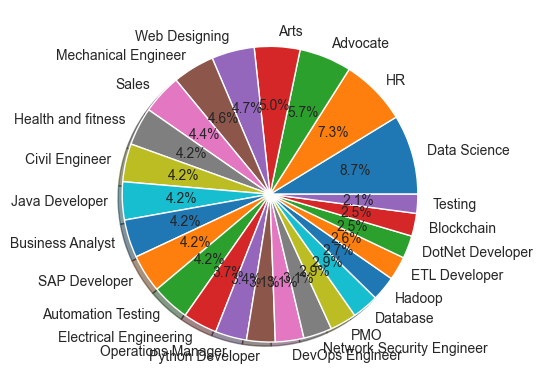

In [5]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.pie(counts, labels=labels,autopct='%1.1f%%',shadow=True)

In [6]:
import re

In [7]:
def cleanResume(txt):
    cleanTxt = re.sub('htpp\S+\s',' ',txt)
    cleanTxt = re.sub('RT|cc',' ',cleanTxt)
    cleanTxt = re.sub('@\S+',' ',cleanTxt)
    cleanTxt = re.sub('#\S+',' ',cleanTxt)
    cleanTxt = re.sub('[%s]' % re.escape("""!"#$%&'()"+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanTxt)    
    cleanTxt = re.sub(r'[^\x00-\x7f]',' ',cleanTxt)
    cleanTxt = re.sub('\s+',' ',cleanTxt)
    return cleanTxt

In [8]:
df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [9]:
df['Resume'] = df['Resume'].apply(lambda x:cleanResume(x))


In [10]:
df['Resume']

0      Skills * Programming Languages Python pandas n...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
le.fit(df['Category'])

LabelEncoder()

In [13]:
df['Category']=le.transform(df['Category'])

In [14]:
df

,Category,Resume
0,6,Skills * Programming Languages Python pandas n...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf.fit(df['Resume'])
requiredText =tfidf.transform(df['Resume'])


In [16]:
from sklearn.model_selection import train_test_split


In [17]:
from sklearn.metrics import accuracy_score

In [18]:
import pickle

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_multilabel_classification



X, y = make_multilabel_classification(n_samples=1000, n_features=20, n_classes=5, n_labels=3, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)


model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


y_pred_proba = model.predict(X_test)


threshold = 0.5
y_pred = (y_pred_proba > threshold).astype(int)

print(y_pred)


Epoch 1/10
25/25 [==============================] - 1s 6ms/step - loss: 0.3737 - accuracy: 0.3850 - val_loss: 0.2980 - val_accuracy: 0.1900
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2818 - accuracy: 0.1650 - val_loss: 0.2845 - val_accuracy: 0.1050
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2716 - accuracy: 0.1325 - val_loss: 0.2759 - val_accuracy: 0.1150
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2633 - accuracy: 0.1550 - val_loss: 0.2705 - val_accuracy: 0.1150
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.1688 - val_loss: 0.2613 - val_accuracy: 0.1350
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.2475 - accuracy: 0.1538 - val_loss: 0.2602 - val_accuracy: 0.1300
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2413 - accuracy: 0.1713 - val_loss: 0.2522 - val_accuracy: 0.1550
Epoch 8/10
25/25 [==

In [20]:
print(accuracy_score(y_test,y_pred))

0.845
